# Regressão Linear - Pandas 
## Ciências de Dados
### Jonatha Rodrigues T. Vaz 
### 10.09.2023
### Modelo Machine Learning

# Iniciando 
## Importando a biblioteca pandas para carregar e visualizar a base de dados.
## Carregando DataFrame (Arquivo)
##  Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

passageiros = pd.read_csv('Passageiros.csv')

## Visualizando rapidamente o DataFrame (Arquivo) 

In [3]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


##  Exibindo os Dados Estatisticos do DATAFRAME 

In [4]:
passageiros.describe()

,tempo,nPassageiros
count,144.000000,144.000000
mean,1954.958333,280.298611
std,3.476109,119.966317
min,1949.000000,104.000000
25%,1951.979167,180.000000
50%,1954.958333,265.500000
75%,1957.937500,360.500000
max,1960.916667,622.000000


# Visualizando através de um Gráfico uma possível Regressão Linear

<Axes: xlabel='tempo', ylabel='nPassageiros'>

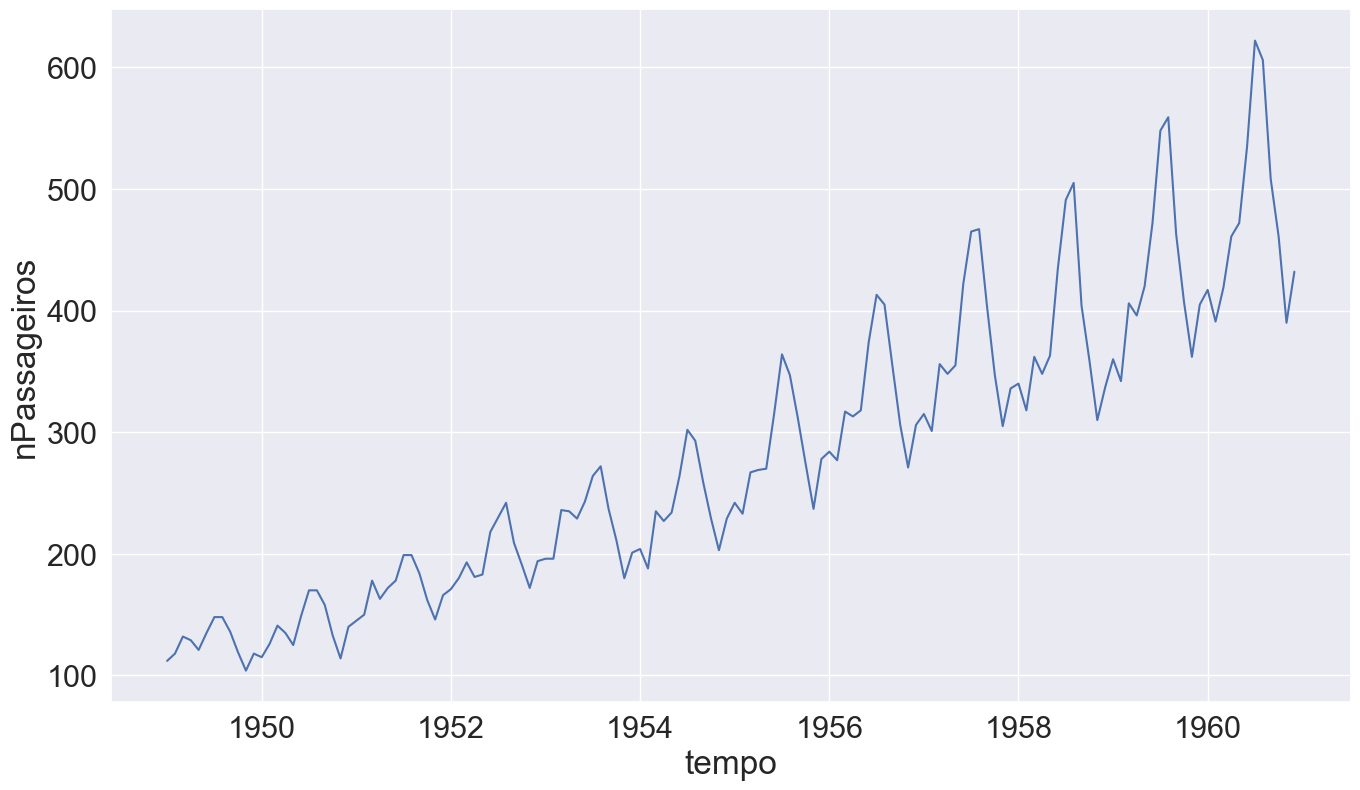

In [5]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

# Selecionando todas as colunas menos a última
# iloc = pegar possições no dataframe de acordo representatividade

In [6]:
Tempo = passageiros.iloc[:,:-1].values

In [7]:
nPassageiros = passageiros.iloc[:,1].values

# Podemos separar parte dos dados para treino e teste

In [8]:
from sklearn.model_selection import train_test_split

Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

# Criando o Modelo, Treinando e Testando com o SklearnModelLinear

In [9]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

# Ajustando a reta aos dados de treino

In [10]:
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression()

# Criando a Predição do Modelo com "Passageiros"

In [11]:
nPassageiros_predito = regressor.predict(Tempo_teste)

# Importando Numpy para Métricas Estatísticas do Modelo ML

In [12]:
import numpy as np

# Colocando os dados em um data frame para posteriormente gerar uma figura com o Seaborn

In [13]:
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })

# Visualizando em um Gráfico a Relação entre Features em um Modelo de Regressão

<Axes: xlabel='Tempo', ylabel='nPassageiros'>

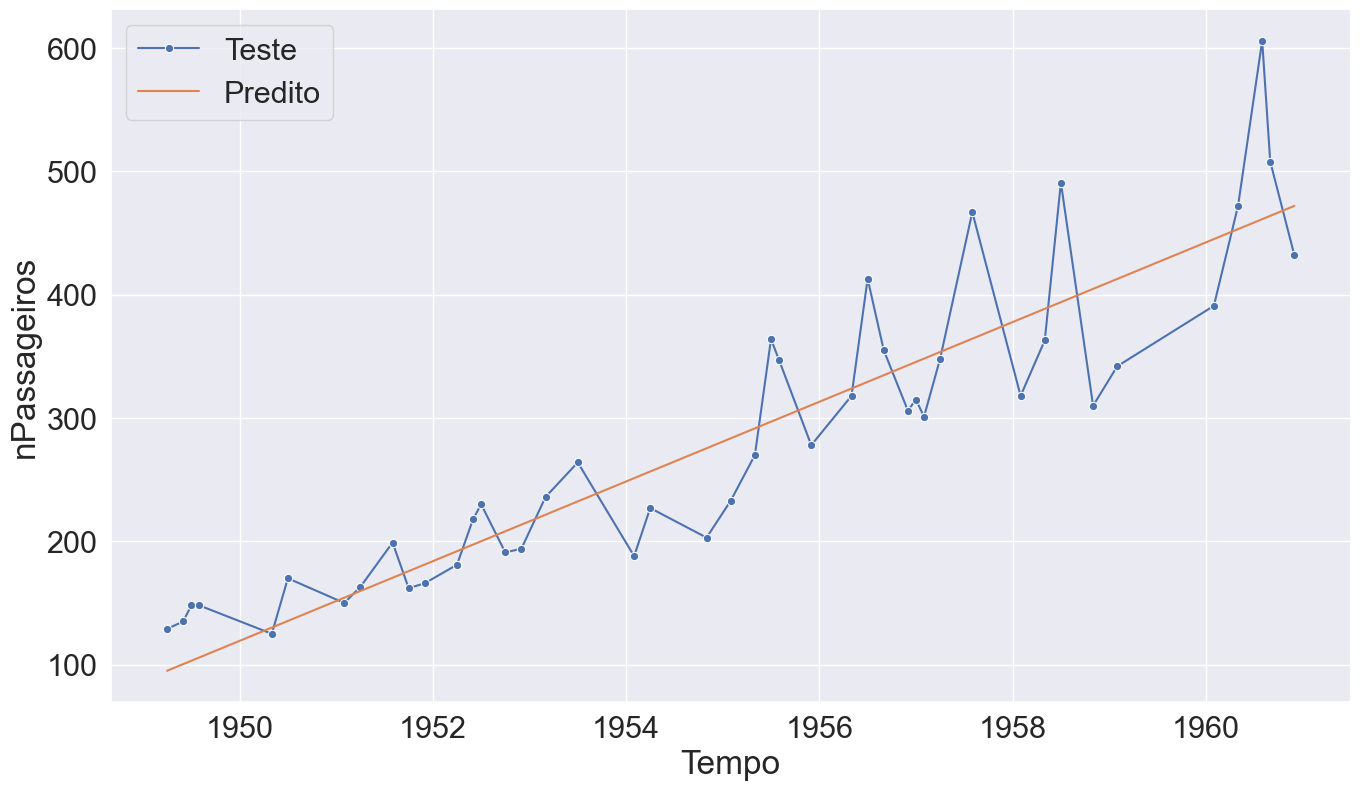

In [14]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

# Visualizando Valores do Coeficiente

In [15]:
print('Coeficiente: \n', regressor.coef_)

Coeficiente: 
 [32.31671477]


# Obtendo Valores de Média de Erro do Modelo e seu Desvio Padrão

In [16]:

print("MSE: %.2f" % np.mean((regressor.predict(Tempo) - nPassageiros) ** 2))


print('Score de variação: %.2f' % regressor.score(Tempo, nPassageiros))

MSE: 2094.66
Score de variação: 0.85


# Usando o Gráfico ScatterPlot para Representação da Regressão Linear

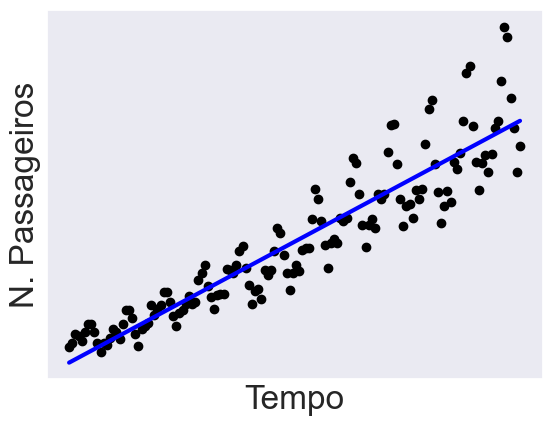

In [17]:
plt.scatter(Tempo, nPassageiros,  color = 'black')
plt.plot(Tempo, regressor.predict(Tempo), color = 'blue', linewidth = 3)
plt.xlabel('Tempo')
plt.ylabel('N. Passageiros')
plt.xticks(())
plt.yticks(())

plt.show()